In [7]:
from datasets import load_dataset
import pandas as pd
# Reading the .csv file
print("Loading Data from file and removing missing data")
bcb = pd.read_csv(
    "/Users/aayushgupta/Library/Mobile Documents/com~apple~CloudDocs/Program testing and analysis/PAT-Clone-Detection_old/train_featureengineered.csv")


print("Dataset Loaded !!!")


# def load_big_clone_bench(split=None):
#     bcb = load_dataset("code_x_glue_cc_clone_detection_big_clone_bench")
#     if split == None:
#         return bcb
#     else:
#         return bcb[split]


Loading Data from file and removing missing data
Dataset Loaded !!!


In [8]:
import difflib
import javalang
import pandas as pd
from tqdm import tqdm


def line_diff(s1: str, s2: str, match_speed="real_quick"):
    differ = difflib.Differ()
    diff = differ.compare(s1.splitlines(True), s2.splitlines(True))
    result = {"unique_s1_lines": 0, "unique_s2_lines": 0, "shared_lines": 0}
    for line in diff:
        if line.startswith("- "):
            result["unique_s1_lines"] += 1
        elif line.startswith("+ "):
            result["unique_s2_lines"] += 1
        elif line.startswith("  "):
            result["shared_lines"] += 1
    seq_match = difflib.SequenceMatcher(None, s1, s2)
    if match_speed == "slow":
        result["similarity_ratio"] = seq_match.ratio()
    elif match_speed == "quick":
        result["similarity_ratio"] = seq_match.quick_ratio()
    elif match_speed == "real_quick":
        result["similarity_ratio"] = seq_match.real_quick_ratio()
    return result

# TODO: generate features from Java ast
# def parse_java(java_string):
#     parse_results = dict()
#     tree = javalang.parse.parse(java_string)
#     return parse_results


def big_clone_bench_preprocess(bcb):
    '''
    Generates DataFrame of features from an input in the format of the BigCloneBench dataset https://huggingface.co/datasets/code_x_glue_cc_clone_detection_big_clone_bench
    '''
    df = pd.DataFrame()
    # parse_results = dict()
    print(f"Preprocessing {len(bcb)} examples...")
    for i in tqdm(range(len(bcb))):
        example = bcb[i]
        example_dict = line_diff(example["func1"], example["func2"])
        example_dict["target"] = int(example["label"])
        # if example["id1"] not in parse_results:
        #     parse_results[example["id1"]] = parse_java(example["func1"])
        # if example["id2"] not in parse_results:
        #     parse_results[example["id2"]] = parse_java(example["func2"])
        df = pd.concat([df, pd.DataFrame([example_dict])], ignore_index=True)
    return df


In [9]:
from data_loader import load_big_clone_bench
from data_preprocess import big_clone_bench_preprocess
import multiprocessing as mp 

pool = mp.Pool(mp.cpu_count())
bcb = load_big_clone_bench("train")
train_df = big_clone_bench_preprocess(bcb)
pool.close()

Found cached dataset code_x_glue_cc_clone_detection_big_clone_bench (/Users/aayushgupta/.cache/huggingface/datasets/code_x_glue_cc_clone_detection_big_clone_bench/default/0.0.0/4c85673dc4ced396531cf81e6c10e61f23eca84ca840ca137f52a15dd19c8789)


  0%|          | 0/3 [00:00<?, ?it/s]

Preprocessing 901028 examples...


100%|██████████| 901028/901028 [4:37:26<00:00, 54.13it/s]     


In [10]:
import matplotlib.pyplot as plt 
import pandas as pd

from IPython.display import display

import numpy as np 

import seaborn as sns 

%matplotlib inline 

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.preprocessing import MinMaxScaler




Summary of dataset 


,unique_s1_lines,unique_s2_lines,shared_lines,similarity_ratio,target
count,901028.000000,901028.000000,901028.000000,901028.000000,901028.000000
mean,29.854949,30.425676,2.937218,0.634136,0.500386
std,40.197042,44.367902,2.754870,0.240125,0.500000
min,0.000000,0.000000,0.000000,0.007355,0.000000
25%,12.000000,12.000000,2.000000,0.455645,0.000000
50%,19.000000,20.000000,3.000000,0.662607,1.000000
75%,33.000000,34.000000,4.000000,0.837137,1.000000
max,915.000000,916.000000,716.000000,1.000000,1.000000


Graphical Representation of data


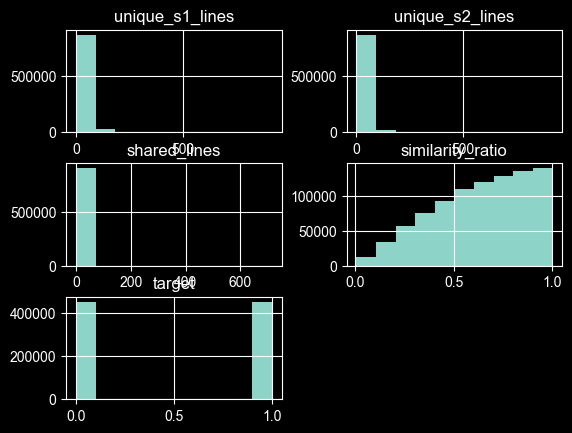

In [11]:
print("Summary of dataset ")
display(train_df.describe(include='all'))
print("Graphical Representation of data")
train_df.hist() 
sns.set(style="darkgrid")
plt.show()


In [12]:
X = train_df.drop('target',axis=1)

y_name = 'target'
y = train_df[y_name]

In [13]:
seed = 42 

test_size = 0.20 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=test_size, random_state=seed)

scoring = 'accuracy'

In [96]:
# import logisticregression classifier
from sklearn.linear_model import LogisticRegression

# import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Chose the algorithms
models = []

#Based on Decision Tree
models.append(('Logistic Regression', LogisticRegression(max_iter=500)))
models.append(('K-Neighbor', KNeighborsClassifier()))
models.append(('Bagging Classifier', BaggingClassifier()))
models.append(('AdaBoost Classifier', AdaBoostClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

# Based on SVMs
models.append(('Linear SVC', LinearSVC()))

# Based on Neural Network 
models.append(("Multi-Layer Perceptron", MLPClassifier()))

k4folds = 5
results = []
names = []
pool = mp.Pool(mp.cpu_count())
for name, model in tqdm(models):   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(
        n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split")
    cv_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (
        name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
pool.close()
print('done \n')


  0%|          | 0/8 [00:00<?, ?it/s]

 ++ NOW WORKING ON ALGORITHM Logistic Regression ++
Splitting data into 5 folds
Training model on each split


 12%|█▎        | 1/8 [00:05<00:40,  5.80s/it]

algorithm Logistic Regression accuracy results: mean = 0.500402 (std = 0.000660)
 ++ NOW WORKING ON ALGORITHM K-Neighbor ++
Splitting data into 5 folds
Training model on each split


 25%|██▌       | 2/8 [00:19<01:02, 10.41s/it]

algorithm K-Neighbor accuracy results: mean = 0.631618 (std = 0.001338)
 ++ NOW WORKING ON ALGORITHM Bagging Classifier ++
Splitting data into 5 folds
Training model on each split


 38%|███▊      | 3/8 [01:29<03:08, 37.61s/it]

algorithm Bagging Classifier accuracy results: mean = 0.746118 (std = 0.001203)
 ++ NOW WORKING ON ALGORITHM AdaBoost Classifier ++
Splitting data into 5 folds
Training model on each split


 50%|█████     | 4/8 [02:19<02:49, 42.45s/it]

algorithm AdaBoost Classifier accuracy results: mean = 0.568396 (std = 0.001731)
 ++ NOW WORKING ON ALGORITHM Decision Tree ++
Splitting data into 5 folds
Training model on each split


 62%|██████▎   | 5/8 [02:29<01:32, 30.84s/it]

algorithm Decision Tree accuracy results: mean = 0.739572 (std = 0.000669)
 ++ NOW WORKING ON ALGORITHM Random Forest ++
Splitting data into 5 folds
Training model on each split


 75%|███████▌  | 6/8 [08:54<05:02, 151.38s/it]

algorithm Random Forest accuracy results: mean = 0.755417 (std = 0.000958)
 ++ NOW WORKING ON ALGORITHM Linear SVC ++
Splitting data into 5 folds
Training model on each split


Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
 88%|████████▊ | 7/8 [14:23<03:29, 209.20s/it]

algorithm Linear SVC accuracy results: mean = 0.505705 (std = 0.006140)
 ++ NOW WORKING ON ALGORITHM Multi-Layer Perceptron ++
Splitting data into 5 folds
Training model on each split


100%|██████████| 8/8 [21:57<00:00, 164.64s/it]

algorithm Multi-Layer Perceptron accuracy results: mean = 0.561114 (std = 0.001131)
done 



In [49]:
import joblib 
joblib.dump(models, 'compare.joblib',compress=3)

['compare.joblib']

In [97]:
import plotly.graph_objs as go
import plotly.express as px

# Assuming 'names' and 'results' are already defined and populated
results_np = np.array(results)

# Define colors for the bars
colors = px.colors.qualitative.Plotly

# Create the interactive bar chart
fig = go.Figure()

for idx, name in enumerate(names):
    mean_value = results_np.mean(axis=1)[idx]
    std_value = results_np.std(axis=1)[idx]
    fig.add_trace(go.Bar(
        x=[name],
        y=[mean_value],
        error_y=dict(type='data', array=[std_value], visible=True),
        name=name,
        marker_color=colors[idx % len(colors)],
        opacity=0.7,
        text=f'Mean: {mean_value:.2f}',
        textposition='auto'
    ))

fig.update_layout(
    title=f'Algorithm Comparison based on {scoring}',
    xaxis_title='Algorithms',
    yaxis_title=scoring,
    showlegend=False,
    template='plotly_white',  # You can choose other templates like 'ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_dark', 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none'
    font=dict(
        family="Arial, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    hovermode='x unified',
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


/var/folders/_t/k4q8g4jd7kq8f8kh6qvvgs_c0000gn/T/ipykernel_24549/4280689190.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


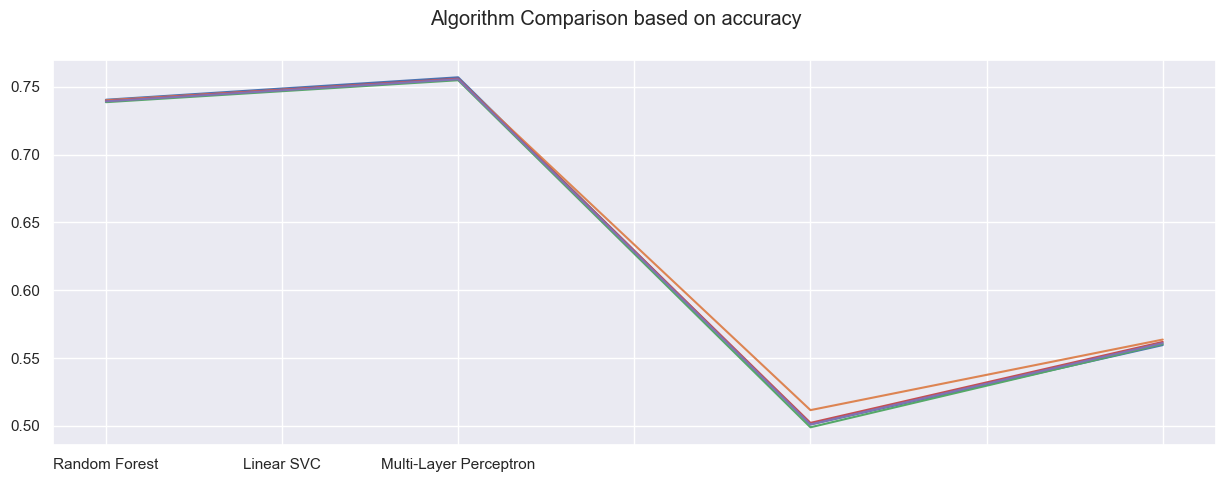

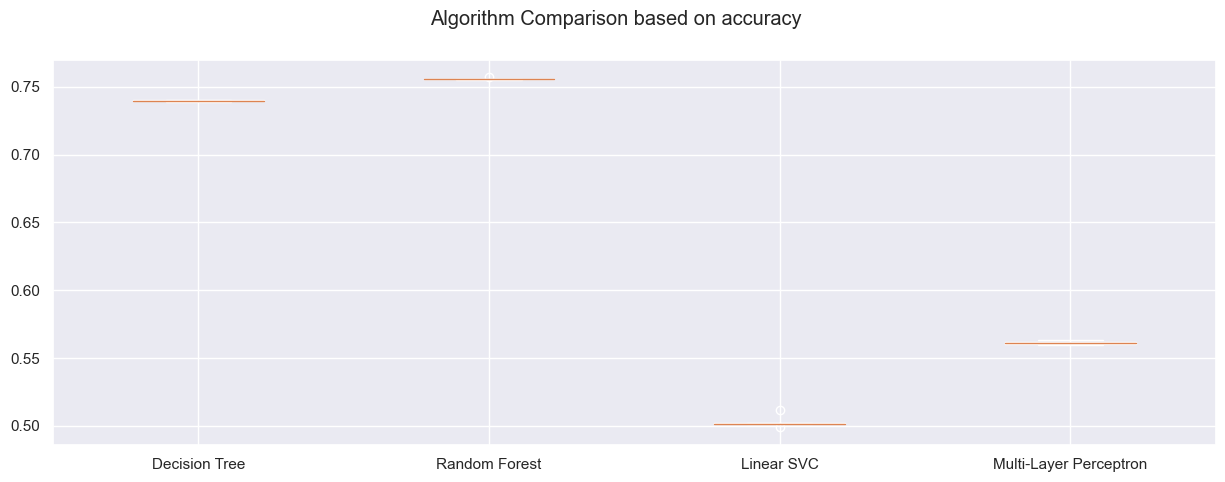

In [19]:
# Compare Algorithms

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
plt.plot(results)
ax.set_xticklabels(names)
plt.show()

# Compare Algorithms
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()




Fitting 5 folds for each of 92 candidates, totalling 460 fits
[CV] END ......................max_depth=27, n_estimators=30; total time=  19.8s
[CV] END ......................max_depth=27, n_estimators=30; total time=  19.4s
[CV] END ......................max_depth=27, n_estimators=30; total time=  19.9s
[CV] END ......................max_depth=27, n_estimators=30; total time=  19.4s
[CV] END ......................max_depth=27, n_estimators=30; total time=  19.8s
[CV] END ......................max_depth=27, n_estimators=35; total time=  23.9s
[CV] END ......................max_depth=27, n_estimators=35; total time=  23.6s
[CV] END ......................max_depth=27, n_estimators=35; total time=  24.3s
[CV] END ......................max_depth=27, n_estimators=35; total time=  23.3s
[CV] END ......................max_depth=27, n_estimators=35; total time=  23.3s
[CV] END ......................max_depth=27, n_estimators=40; total time=  26.9s
[CV] END ......................max_depth=27, n_

100%|██████████| 25/25 [46:39<00:00, 112.00s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


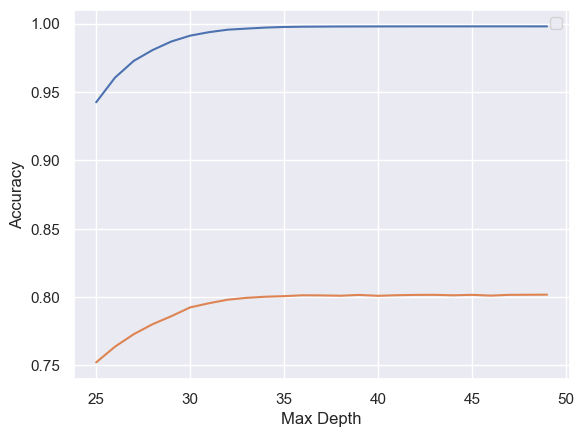

In [32]:
# Tuning Random Forest Classifier 

hyperparameters_RF = {'max_depth': np.arange(
    27, 50), 'n_estimators': np.arange(30, 50, 5)}
clf = GridSearchCV(RandomForestClassifier(),
                   hyperparameters_RF, cv=5, scoring=scoring, verbose=2)
clf.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_

training_accuracy = []
test_accuracy = []

max_dep = range(25, 50)
neighbors_setting = range(30, 50)
pool = mp.Pool(mp.cpu_count())
for md in tqdm(max_dep):
    tree = RandomForestClassifier(max_depth=md, random_state=seed)
    tree.fit(X_train, y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
pool.close()



In [35]:

joblib.dump(hyperparameters_RF, 'random_forest.joblib',compress=3)

['random_forest.joblib']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


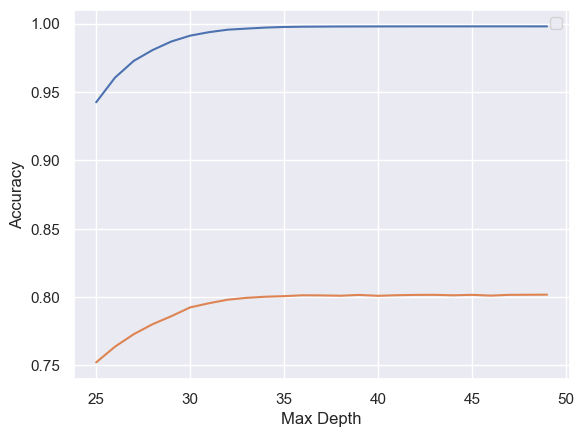

In [36]:
sns.set(style="darkgrid")
sns.lineplot(x=max_dep, y=training_accuracy)
sns.lineplot(x=max_dep, y=test_accuracy)
# plt.plot(max_dep, training_accuracy, label='Accuracy of the training set')
# plt.plot(max_dep, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')


plt.legend()
plt.show()

In [44]:

# Assuming 'max_dep', 'training_accuracy', and 'test_accuracy' are already defined and populated
# Create the interactive line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(max_dep),
    y=training_accuracy,
    mode='lines+markers',
    name='Accuracy of the training set',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Max Depth: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(max_dep),
    y=test_accuracy,
    mode='lines+markers',
    name='Accuracy of the test set',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Max Depth: %{x}<br>Test Accuracy: %{y:.2f}'
))

fig.update_layout(
    title='Model Accuracy vs Max Depth in Random Forest Classifier',
    xaxis_title='Max Depth',
    yaxis_title='Accuracy',
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    template='plotly_white',
    font=dict(
        family="Arial, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    hovermode='x unified',
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


In [53]:
neighbors_setting = range(30, 50)
training_accuracy_ns = []
test_accuracy_ns = []
for ns in tqdm(neighbors_setting):
    tree = RandomForestClassifier(n_estimators=ns, random_state=seed)
    tree.fit(X_train, y_train)
    training_accuracy_ns.append(tree.score(X_train, y_train))
    test_accuracy_ns.append(tree.score(X_test, y_test))


100%|██████████| 20/20 [15:24<00:00, 46.24s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


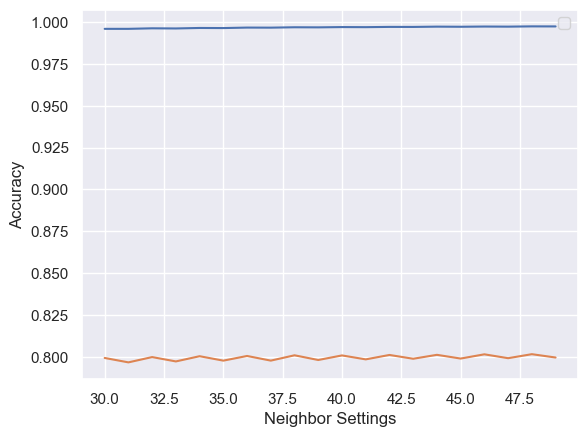

In [54]:
sns.set(style="darkgrid")
sns.lineplot(x=neighbors_setting, y=training_accuracy_ns)
sns.lineplot(x=neighbors_setting, y=test_accuracy_ns)
# plt.plot(max_dep, training_accuracy, label='Accuracy of the training set')
# plt.plot(max_dep, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Neighbor Settings')


plt.legend()
plt.show()


In [55]:
# Create the interactive line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(neighbors_setting),
    y=training_accuracy_ns,
    mode='lines+markers',
    name='Accuracy of the training set',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Neighbors Settings: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(neighbors_setting),
    y=test_accuracy_ns,
    mode='lines+markers',
    name='Accuracy of the test set',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Neighbors Settings: %{x}<br>Test Accuracy: %{y:.2f}'
))

fig.update_layout(
    title='Model Accuracy vs Neighbors Setting in Random Forest Classifier',
    xaxis_title='Neighbor Setting',
    yaxis_title='Accuracy',
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    template='plotly_white',
    font=dict(
        family="Arial, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    hovermode='x unified',
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


In [63]:
# Create a new figure
fig = go.Figure()

# Add the first two traces (Neighbor Settings)
fig.add_trace(go.Scatter(
    x=list(neighbors_setting),
    y=training_accuracy_ns,
    mode='lines+markers',
    name='Training Accuracy (Neighbor Settings)',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Neighbor Settings: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(neighbors_setting),
    y=test_accuracy_ns,
    mode='lines+markers',
    name='Test Accuracy (Neighbor Settings)',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Neighbor Settings: %{x}<br>Test Accuracy: %{y:.2f}'
))

# Add the other two traces (Max Depth)
fig.add_trace(go.Scatter(
    x=list(max_dep),
    y=training_accuracy,
    mode='lines+markers',
    name='Training Accuracy (Max Depth)',
    line=dict(color='green', width=2),
    marker=dict(size=8, symbol='square', color='green'),
    hovertemplate='Max Depth: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(max_dep),
    y=test_accuracy,
    mode='lines+markers',
    name='Test Accuracy (Max Depth)',
    line=dict(color='purple', width=2),
    marker=dict(size=8, symbol='square', color='purple'),
    hovertemplate='Max Depth: %{x}<br>Test Accuracy: %{y:.2f}'
))

# Update the layout
fig.update_layout(
    title='Combined Accuracy Plots',
    xaxis_title='Parameter Values',
    yaxis_title='Accuracy',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    hovermode='x unified'
)

# Show the figure
fig.show()


In [33]:
# Tuning Decision Tree Classifier

hyperparameters_DT = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
}
clf_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                   hyperparameters_DT, cv=5, scoring='accuracy', n_jobs=-1)
clf_dt.fit(X_train, y_train)
print("Best Hyperparameters for Random Forest")
print(clf_dt.best_params_)
tuned_model_DT = clf_dt.best_estimator_

training_accuracy_dt = []
test_accuracy_dt = []

max_depth = range(1,20)


for ms in tqdm(max_depth): # Switch max_depth with min_samples and min_sample_leaf
    tree_dt = DecisionTreeClassifier(max_depth=ms, random_state=seed)
    tree_dt.fit(X_train, y_train)
    training_accuracy_dt.append(tree_dt.score(X_train, y_train))
    test_accuracy_dt.append(tree_dt.score(X_test, y_test))



Best Hyperparameters for Random Forest
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


100%|██████████| 19/19 [00:23<00:00,  1.23s/it]


In [38]:
joblib.dump(hyperparameters_DT, 'Decision_tree.joblib',compress=3)

['Decision_tree.joblib']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


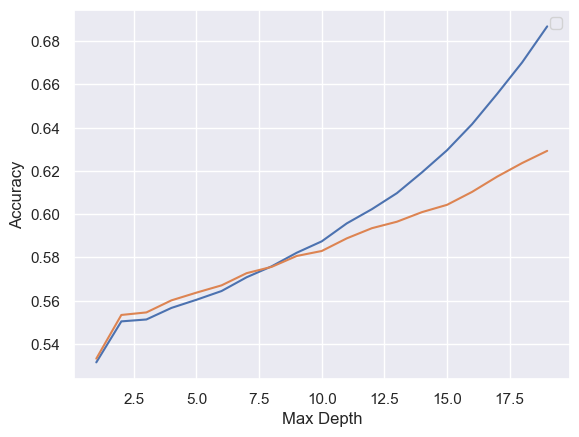

In [39]:
sns.set(style="darkgrid")
sns.lineplot(x=max_depth, y=training_accuracy_dt)
sns.lineplot(x=max_depth, y=test_accuracy_dt)
# plt.plot(max_dep, training_accuracy, label='Accuracy of the training set')
# plt.plot(max_dep, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.show()


In [48]:
# Assuming 'max_dep', 'training_accuracy', and 'test_accuracy' are already defined and populated
# Create the interactive line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(max_depth),
    y=training_accuracy_dt,
    mode='lines+markers',
    name='Accuracy of the training set',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Max Depth: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(max_depth),
    y=test_accuracy_dt,
    mode='lines+markers',
    name='Accuracy of the test set',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Max Depth: %{x}<br>Test Accuracy: %{y:.2f}'
))

fig.update_layout(
    title='Model Accuracy vs Max Depth in Decision Tree',
    xaxis_title='Max Depth',
    yaxis_title='Accuracy',
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    template='plotly_white',
    font=dict(
        family="Arial, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    hovermode='x unified',
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


In [66]:
training_accuracy_samples = []
test_accuracy_samples = []

min_sample_leaf = range(1, 20)


for ms in tqdm(min_samples):  # Switch max_depth with min_samples and min_sample_leaf
    tree_samples = DecisionTreeClassifier(
        min_samples_split=ms, random_state=seed)
    tree_samples.fit(X_train, y_train)
    training_accuracy_samples.append(tree_samples.score(X_train, y_train))
    test_accuracy_samples.append(tree_samples.score(X_test, y_test))


100%|██████████| 18/18 [00:50<00:00,  2.79s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


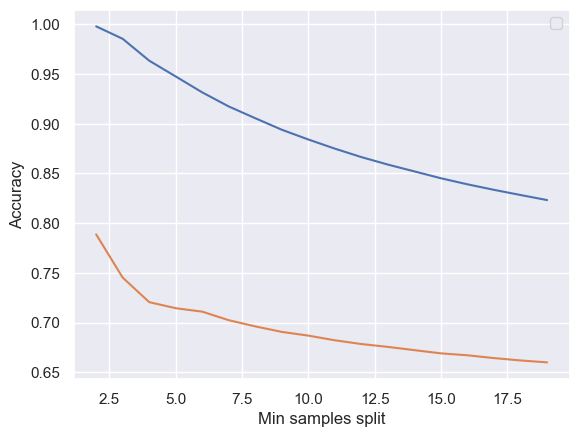

In [67]:
sns.set(style="darkgrid")
sns.lineplot(x=min_samples, y=training_accuracy_samples)
sns.lineplot(x=min_samples, y=test_accuracy_samples)
# plt.plot(max_dep, training_accuracy, label='Accuracy of the training set')
# plt.plot(max_dep, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Min samples split')
plt.legend()
plt.show()


In [68]:
# Create the interactive line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(min_samples),
    y=training_accuracy_samples,
    mode='lines+markers',
    name='Accuracy of the training set',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Min Sample Split: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(min_samples),
    y=test_accuracy_samples,
    mode='lines+markers',
    name='Accuracy of the test set',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Min Sample Split: %{x}<br>Test Accuracy: %{y:.2f}'
))

fig.update_layout(
    title='Model Accuracy vs Min Sample Split in Decision Tree',
    xaxis_title='Min Sample Split',
    yaxis_title='Accuracy',
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    template='plotly_white',
    font=dict(
        family="Arial, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    hovermode='x unified',
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


In [69]:
training_accuracy_leaf = []
test_accuracy_leaf = []

min_sample_leaf = range(1, 20)


for ms in tqdm(min_sample_leaf):  # Switch max_depth with min_samples and min_sample_leaf
    tree_leaf = DecisionTreeClassifier(
        min_samples_leaf=ms, random_state=seed)
    tree_leaf.fit(X_train, y_train)
    training_accuracy_leaf.append(tree_leaf.score(X_train, y_train))
    test_accuracy_leaf.append(tree_leaf.score(X_test, y_test))


100%|██████████| 19/19 [00:47<00:00,  2.52s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


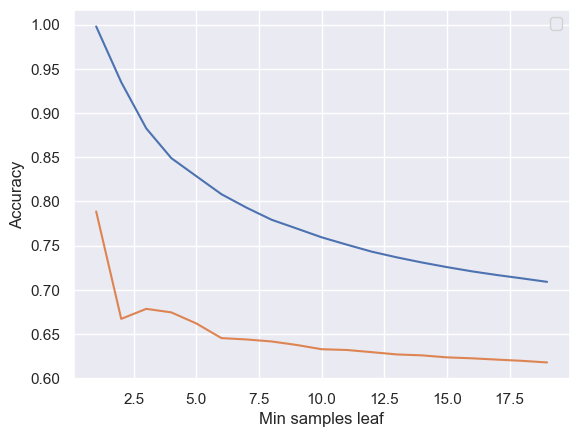

In [70]:
sns.set(style="darkgrid")
sns.lineplot(x=min_sample_leaf, y=training_accuracy_leaf)
sns.lineplot(x=min_sample_leaf, y=test_accuracy_leaf)
# plt.plot(max_dep, training_accuracy, label='Accuracy of the training set')
# plt.plot(max_dep, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Min samples leaf')
plt.legend()
plt.show()


In [71]:
# Create the interactive line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(min_sample_leaf),
    y=training_accuracy_leaf ,
    mode='lines+markers',
    name='Accuracy of the training set',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Min Sample leaf: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(min_sample_leaf ),
    y=test_accuracy_leaf,
    mode='lines+markers',
    name='Accuracy of the test set',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Min Sample leaf: %{x}<br>Test Accuracy: %{y:.2f}'
))

fig.update_layout(
    title='Model Accuracy vs Min Sample leaf in Decision Tree',
    xaxis_title='Min Sample leaf',
    yaxis_title='Accuracy',
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    template='plotly_white',
    font=dict(
        family="Arial, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    hovermode='x unified',
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


In [75]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Add the first two traces (Max Depth)
fig.add_trace(go.Scatter(
    x=list(max_depth),
    y=training_accuracy_dt,
    mode='lines+markers',
    name='Training Accuracy (Max Depth)',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Max Depth: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(max_depth),
    y=test_accuracy_dt,
    mode='lines+markers',
    name='Test Accuracy (Max Depth)',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Max Depth: %{x}<br>Test Accuracy: %{y:.2f}'
))

# Add the other two traces (Min Samples Split)
fig.add_trace(go.Scatter(
    x=list(min_samples),
    y=training_accuracy_samples,
    mode='lines+markers',
    name='Training Accuracy (Min Samples Split)',
    line=dict(color='green', width=2),
    marker=dict(size=8, symbol='square', color='green'),
    hovertemplate='Min Samples Split: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(min_samples),
    y=test_accuracy_samples,
    mode='lines+markers',
    name='Test Accuracy (Min Samples Split)',
    line=dict(color='purple', width=2),
    marker=dict(size=8, symbol='square', color='purple'),
    hovertemplate='Min Samples Split: %{x}<br>Test Accuracy: %{y:.2f}'
))

# Add the last two traces (Min Samples Leaf)
fig.add_trace(go.Scatter(
    x=list(min_sample_leaf),
    y=training_accuracy_leaf,
    mode='lines+markers',
    name='Training Accuracy (Min Samples Leaf)',
    line=dict(color='orange', width=2),
    marker=dict(size=8, symbol='diamond', color='orange'),
    hovertemplate='Min Samples Leaf: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(min_sample_leaf),
    y=test_accuracy_leaf,
    mode='lines+markers',
    name='Test Accuracy (Min Samples Leaf)',
    line=dict(color='brown', width=2),
    marker=dict(size=8, symbol='diamond', color='brown'),
    hovertemplate='Min Samples Leaf: %{x}<br>Test Accuracy: %{y:.2f}'
))

# Update the layout
fig.update_layout(
    title='Combined Accuracy Plots',
    xaxis_title='Parameter Values',
    yaxis_title='Accuracy',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    hovermode='x unified'
)

# Show the figure
fig.show()


In [87]:
# Tuning linearSVC
from sklearn.model_selection import RandomizedSearchCV
print("Tuning Linear SVC Model!")

# Scale the input features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

hyperparameters_lSVC = {'C': [0.1, 0.01, 0.001],
                        'tol': [0.1, 0.01, 0.001]}
clf = RandomizedSearchCV(LinearSVC(max_iter=5000),
                   hyperparameters_lSVC, cv=5, scoring=scoring, verbose=3)
clf.fit(X_train, y_train)
print("Best Hyperparameters for linear SVC")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_


Tuning Linear SVC Model!
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning:

The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.

/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 1/5] END ....................C=0.1, tol=0.1;, score=0.493 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 2/5] END ....................C=0.1, tol=0.1;, score=0.498 total time=44.5min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END ...................C=0.1, tol=0.1;, score=0.496 total time=162.5min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 4/5] END ....................C=0.1, tol=0.1;, score=0.519 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END ....................C=0.1, tol=0.1;, score=0.499 total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 1/5] END ...................C=0.1, tol=0.01;, score=0.494 total time= 5.0min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 2/5] END ...................C=0.1, tol=0.01;, score=0.497 total time= 5.1min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END ...................C=0.1, tol=0.01;, score=0.507 total time= 5.3min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 4/5] END ...................C=0.1, tol=0.01;, score=0.490 total time= 5.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END ...................C=0.1, tol=0.01;, score=0.494 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 1/5] END ..................C=0.1, tol=0.001;, score=0.496 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 2/5] END ..................C=0.1, tol=0.001;, score=0.502 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END ..................C=0.1, tol=0.001;, score=0.499 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 4/5] END ..................C=0.1, tol=0.001;, score=0.498 total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END ..................C=0.1, tol=0.001;, score=0.496 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 1/5] END ...................C=0.01, tol=0.1;, score=0.499 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 2/5] END ...................C=0.01, tol=0.1;, score=0.500 total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END ...................C=0.01, tol=0.1;, score=0.501 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 4/5] END ...................C=0.01, tol=0.1;, score=0.500 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END ...................C=0.01, tol=0.1;, score=0.500 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 1/5] END ..................C=0.01, tol=0.01;, score=0.499 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 2/5] END ..................C=0.01, tol=0.01;, score=0.500 total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END ..................C=0.01, tol=0.01;, score=0.500 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 4/5] END ..................C=0.01, tol=0.01;, score=0.500 total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END ..................C=0.01, tol=0.01;, score=0.500 total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 1/5] END .................C=0.01, tol=0.001;, score=0.500 total time= 5.1min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 2/5] END .................C=0.01, tol=0.001;, score=0.500 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END .................C=0.01, tol=0.001;, score=0.500 total time= 5.0min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 4/5] END .................C=0.01, tol=0.001;, score=0.500 total time= 5.0min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END .................C=0.01, tol=0.001;, score=0.500 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 1/5] END ..................C=0.001, tol=0.1;, score=0.501 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 2/5] END ..................C=0.001, tol=0.1;, score=0.501 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END ..................C=0.001, tol=0.1;, score=0.501 total time= 4.9min
[CV 4/5] END ..................C=0.001, tol=0.1;, score=0.501 total time= 4.7min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END ..................C=0.001, tol=0.1;, score=0.501 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 1/5] END .................C=0.001, tol=0.01;, score=0.501 total time= 5.0min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 2/5] END .................C=0.001, tol=0.01;, score=0.501 total time= 5.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END .................C=0.001, tol=0.01;, score=0.501 total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 4/5] END .................C=0.001, tol=0.01;, score=0.501 total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END .................C=0.001, tol=0.01;, score=0.501 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 1/5] END ................C=0.001, tol=0.001;, score=0.501 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 2/5] END ................C=0.001, tol=0.001;, score=0.501 total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 3/5] END ................C=0.001, tol=0.001;, score=0.501 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 4/5] END ................C=0.001, tol=0.001;, score=0.501 total time= 4.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[CV 5/5] END ................C=0.001, tol=0.001;, score=0.501 total time= 4.9min
Best Hyperparameters for linear SVC
{'tol': 0.1, 'C': 0.1}


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [88]:
training_accuracy_lsvc = []
test_accuracy_lsvc = []

C = [x / 10.0 for x in range(1, 101)]

for ls in tqdm(C):
    tree_lsvc = LinearSVC(C=ls)
    tree_lsvc.fit(X_train, y_train)
    training_accuracy_lsvc.append(tree_lsvc.score(X_train, y_train))
    test_accuracy_lsvc.append(tree_lsvc.score(X_test, y_test))


  0%|          | 0/100 [00:00<?, ?it/s]/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

  1%|          | 1/100 [01:16<2:06:58, 76.95s/it]/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

  2%|▏         | 2/100 [02:34<2:06:05, 77.20s/it]/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

  3%|▎         | 3/100 [05:08<2:46:24, 102.94s/it]


KeyboardInterrupt: 

In [ ]:
sns.set(style="darkgrid")
sns.lineplot(x=C, y=training_accuracy_lsvc)
sns.lineplot(x=C, y=test_accuracy_lsvc)
# plt.plot(max_dep, training_accuracy, label='Accuracy of the training set')
# plt.plot(max_dep, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.show()


NameError: name 'max_depth_lsvc' is not defined

In [ ]:
# joblib.dump(hyperparameters_lSVC, 'Linear_SVC.joblib',compress=3)

In [ ]:
# # For MLP Classifier 
# from sklearn.neural_network import MLPClassifier
# # 1st combination of architecture choices
# mlp_1 = MLPClassifier(hidden_layer_sizes=(10, 10, 10),
#                       activation='relu')
# scores_1 = cross_val_score(mlp_1, X, y, cv=5)
# scores_1a = accuracy_score(mlp_1)

# # 2nd combination of architecture choices
# mlp_2 = MLPClassifier(hidden_layer_sizes=(20, 20,),
#                       activation='logistic')
# scores_2 = cross_val_score(mlp_2, X, y, cv=5)

# # 3rd combination of architecture choices
# mlp_3 = MLPClassifier(hidden_layer_sizes=(30,),
#                       activation='tanh')
# scores_3 = cross_val_score(mlp_3, X, y, cv=5)


In [ ]:
# print("Cross Validation score for Model 1: ", scores_1.mean())
# print("Cross Validation score for Model 2: ", scores_2.mean())
# print("Cross Validation score for Model 3: ", scores_3.mean())


In [112]:
# Tuning Bagging Classifier
term = range(1,15)
hyperparameters_bag = {
    'max_samples': [0.6,0.7,0.8,0.9,0.99,1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=d) for d in term],
    'bootstrap': [True]
}
clf = GridSearchCV(BaggingClassifier(),
                   hyperparameters_bag, cv=5, scoring=scoring, verbose=2)
clf.fit(X_train, y_train)
print("Best Hyperparameters for Bagging")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_




Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), bootstrap=True, max_samples=0.6; total time=   0.9s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), bootstrap=True, max_samples=0.6; total time=   0.9s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), bootstrap=True, max_samples=0.6; total time=   0.9s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), bootstrap=True, max_samples=0.6; total time=   0.9s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), bootstrap=True, max_samples=0.6; total time=   1.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), bootstrap=True, max_samples=0.7; total time=   1.0s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), bootstrap=True, max_samples=0.7; total time=   1.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), bootstrap=True, max_samples=0.7; total time=   1.1s
[CV] END base_estimator=DecisionTr

In [117]:
training_accuracy_bag = []
test_accuracy_bag = []

max_samples_bag = [0.6, 0.7, 0.8, 0.9, 0.99, 1.0]


for md in tqdm(max_samples_bag):
    tree_bag = BaggingClassifier(max_samples=md, random_state=seed)
    tree_bag.fit(X_train, y_train)
    training_accuracy_bag.append(tree_bag.score(X_train, y_train))
    test_accuracy_bag.append(tree_bag.score(X_test, y_test))



100%|██████████| 6/6 [01:49<00:00, 18.25s/it]


In [114]:
# Create the interactive line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(max_samples_bag),
    y=training_accuracy_bag,
    mode='lines+markers',
    name='Accuracy of the training set',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Min Sample leaf: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(max_samples_bag),
    y=test_accuracy_bag,
    mode='lines+markers',
    name='Accuracy of the test set',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Min Sample leaf: %{x}<br>Test Accuracy: %{y:.2f}'
))

fig.update_layout(
    title='Model Accuracy vs Min Sample leaf in Decision Tree',
    xaxis_title='Max Samples',
    yaxis_title='Accuracy',
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    template='plotly_white',
    font=dict(
        family="Arial, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    hovermode='x unified',
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


In [115]:
training_accuracy_bag1 = []
test_accuracy_bag1 = []

base_estimator1 = [DecisionTreeClassifier(max_depth=d) for d in term]


for md in tqdm(base_estimator1):
    tree_bag1 = BaggingClassifier(base_estimator=md, random_state=seed)
    tree_bag1.fit(X_train, y_train)
    training_accuracy_bag1.append(tree_bag1.score(X_train, y_train))
    test_accuracy_bag1.append(tree_bag1.score(X_test, y_test))


100%|██████████| 14/14 [01:35<00:00,  6.81s/it]


In [116]:
# Create the interactive line chart
fig = go.Figure()
# term = [4, 5, 6, 7, 8]
fig.add_trace(go.Scatter(
    x=list(term),
    y=training_accuracy_bag1,
    mode='lines+markers',
    name='Accuracy of the training set',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Min Sample leaf: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(term),
    y=test_accuracy_bag1,
    mode='lines+markers',
    name='Accuracy of the test set',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Min Sample leaf: %{x}<br>Test Accuracy: %{y:.2f}'
))

fig.update_layout(
    title='Model Accuracy vs Min Sample leaf in Decision Tree',
    xaxis_title='Base Estimator',
    yaxis_title='Accuracy',
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    template='plotly_white',
    font=dict(
        family="Arial, monospace",
        size=14,
        color="RebeccaPurple"
    ),
    hovermode='x unified',
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


In [118]:
import plotly.graph_objects as go

# Create a new figure
fig = go.Figure()

# Add the first two traces (Max Depth)
fig.add_trace(go.Scatter(
    x=list(max_samples_bag),
    y=training_accuracy_bag,
    mode='lines+markers',
    name='Training Accuracy (Max Depth)',
    line=dict(color='blue', width=2),
    marker=dict(size=8, symbol='circle', color='blue'),
    hovertemplate='Max Depth: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(max_samples_bag),
    y=test_accuracy_bag,
    mode='lines+markers',
    name='Test Accuracy (Max Depth)',
    line=dict(color='red', width=2),
    marker=dict(size=8, symbol='circle', color='red'),
    hovertemplate='Max Depth: %{x}<br>Test Accuracy: %{y:.2f}'
))

# Add the other two traces (Min Samples Split)
fig.add_trace(go.Scatter(
    x=list(term),
    y=training_accuracy_bag1,
    mode='lines+markers',
    name='Training Accuracy (Min Samples Split)',
    line=dict(color='green', width=2),
    marker=dict(size=8, symbol='square', color='green'),
    hovertemplate='Min Samples Split: %{x}<br>Training Accuracy: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x=list(term),
    y=test_accuracy_bag1,
    mode='lines+markers',
    name='Test Accuracy (Min Samples Split)',
    line=dict(color='purple', width=2),
    marker=dict(size=8, symbol='square', color='purple'),
    hovertemplate='Min Samples Split: %{x}<br>Test Accuracy: %{y:.2f}'
))


# Update the layout
fig.update_layout(
    title='Combined Accuracy Plots',
    xaxis_title='Parameter Values',
    yaxis_title='Accuracy',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    hovermode='x unified'
)

# Show the figure
fig.show()
